In [1]:
# Mini Project: House Price Prediction 

In [2]:
# Importing Required Libraries & Configuration

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os, pickle, zipfile

In [4]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer     
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [8]:
from sklearn.neighbors import KNeighborsRegressor

In [9]:
# Ignore unnecessary warnings and set display settings
import warnings
warnings.filterwarnings("ignore")

In [10]:
pd.set_option('display.max_columns', 120)
pd.set_option('display.width', 220)

In [11]:
# Loading the Dataset

In [12]:
DATA_PATH = "F:/description (1)/home_data.csv"

df = pd.read_csv(DATA_PATH)
print("Shape:", df.shape)
df


Shape: (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [13]:
#  Initial Exploratory Data Analysis (EDA)

In [14]:
#  Display all column names in the dataset
print("Available Columns in Dataset:\n", df.columns.tolist())

Available Columns in Dataset:
 ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [15]:
#  Check and print missing values 
print("\n Missing Values Count Per Column:")
missing_cols = df.isnull().sum()[df.isnull().sum() > 0] 
print(missing_cols if len(missing_cols) > 0 else "No missing values found ")


 Missing Values Count Per Column:
No missing values found 


In [16]:
print("\n Statistical Summary of Dataset:")
display(df.describe(include='all').T)


 Statistical Summary of Dataset:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,21613.0,NaN,NaN,NaN,4580301520.864988,2876565571.312049,1000102.0,2123049194.0,3904930410.0,7308900445.0,9900000190.0
date,21613,372,20140623T000000,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,21613.0,NaN,NaN,NaN,540088.141905,367127.195968,75000.0,321950.0,450000.0,645000.0,7700000.0
bedrooms,21613.0,NaN,NaN,NaN,3.370842,0.930062,0.0,3.0,3.0,4.0,33.0
bathrooms,21613.0,NaN,NaN,NaN,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
sqft_living,21613.0,NaN,NaN,NaN,2079.899736,918.440897,290.0,1427.0,1910.0,2550.0,13540.0
sqft_lot,21613.0,NaN,NaN,NaN,15106.967566,41420.511515,520.0,5040.0,7618.0,10688.0,1651359.0
floors,21613.0,NaN,NaN,NaN,1.494309,0.539989,1.0,1.0,1.5,2.0,3.5
waterfront,21613.0,NaN,NaN,NaN,0.007542,0.086517,0.0,0.0,0.0,0.0,1.0
view,21613.0,NaN,NaN,NaN,0.234303,0.766318,0.0,0.0,0.0,0.0,4.0


In [17]:
#  Data Cleaning & Feature Engineering

In [18]:
# Create a copy of the original dataset to avoid modifications
df2 = df.copy()

In [19]:
# Remove 'id' column if it exists 
if 'id' in df2.columns:
    df2.drop(columns=['id'], inplace=True)

In [20]:
# Convert 'date' column to datetime format & extract year/month of sale
if 'date' in df2.columns:
    df2['date'] = pd.to_datetime(df2['date'], errors='coerce')
    df2['year_sold'] = df2['date'].dt.year
    df2['month_sold'] = df2['date'].dt.month
    df2.drop(columns=['date'], inplace=True)

In [21]:
# Calculate house age: year sold - year built
if {'yr_built', 'year_sold'}.issubset(df2.columns):
    df2['house_age'] = df2['year_sold'] - df2['yr_built']

In [22]:
# Renovation flag — 1 if renovated, else 0
if 'yr_renovated' in df2.columns:
    df2['was_renovated'] = (df2['yr_renovated'] > 0).astype(int)

In [23]:
# Inspect a few engineered columns
display(df2.head()[['year_sold','month_sold','house_age','yr_renovated','was_renovated']].head())

,year_sold,month_sold,house_age,yr_renovated,was_renovated
0,2014,10,59,0,0
1,2014,12,63,1991,1
2,2015,2,82,0,0
3,2014,12,49,0,0
4,2015,2,28,0,0


In [24]:
# Choose Target & Feature Columns

In [25]:
target = 'price'  # change if dataset has a different target column
assert target in df2.columns, "Target column not found!"

In [26]:
# Separate X (features) and y (target)
X = df2.drop(columns=[target])
y = df2[target].copy()

In [27]:
print("Feature count:", X.shape[1])

Feature count: 22


In [28]:
# Identify numeric and categorical features
numeric_feats = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_feats = X.select_dtypes(exclude=[np.number]).columns.tolist()

In [29]:
print("Example numeric columns:", numeric_feats[:12], "...")
print("Example categorical columns:", categorical_feats[:12], "...")

Example numeric columns: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built'] ...
Example categorical columns: [] ...


In [30]:
# Decide How to Encode Categorical Features

In [31]:
# Ensure zipcode is treated as categorical instead of numeric
if 'zipcode' in X.columns and 'zipcode' not in categorical_feats:
    if 'zipcode' in numeric_feats:
        numeric_feats.remove('zipcode')
    categorical_feats.append('zipcode')

In [32]:
# Display lists to verify
numeric_feats, categorical_feats

(['bedrooms',
  'bathrooms',
  'sqft_living',
  'sqft_lot',
  'floors',
  'waterfront',
  'view',
  'condition',
  'grade',
  'sqft_above',
  'sqft_basement',
  'yr_built',
  'yr_renovated',
  'lat',
  'long',
  'sqft_living15',
  'sqft_lot15',
  'year_sold',
  'month_sold',
  'house_age',
  'was_renovated'],
 ['zipcode'])

In [33]:
# Train/Test Split

In [34]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42

In [35]:
# 80% data for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=RANDOM_STATE
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (17290, 22)
Testing set shape: (4323, 22)


In [36]:
# Manual preprocessing

In [37]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [38]:
# Separate numeric & categorical columns
numeric_feats = X.select_dtypes(include=['int64','float64']).columns
categorical_feats = X.select_dtypes(exclude=['int64','float64']).columns

In [39]:
# Numeric preprocessing
num_imputer = SimpleImputer(strategy='median')
X_train_num = num_imputer.fit_transform(X_train[numeric_feats])
X_test_num = num_imputer.transform(X_test[numeric_feats])

scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train_num)
X_test_num = scaler.transform(X_test_num)

In [40]:
# Categorical preprocessing
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train_cat = cat_imputer.fit_transform(X_train[categorical_feats])
X_test_cat = cat_imputer.transform(X_test[categorical_feats])

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_cat = encoder.fit_transform(X_train_cat)
X_test_cat = encoder.transform(X_test_cat)

In [41]:
# Final processed X
import numpy as np
X_train_final = np.hstack((X_train_num, X_train_cat))
X_test_final = np.hstack((X_test_num, X_test_cat))

In [44]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [45]:
# ----------------------------------------------------------
# Train ALL MODELS
# ----------------------------------------------------------

In [46]:
#Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_final, y_train_log)
pred_lr = lr.predict(X_test_final)

In [68]:
# Linear Regression
rmse_lr = rmse(y_test_log, pred_lr)
r2_lr = r2_score(y_test_log, pred_lr)
print("Linear Regression -> RMSE:", rmse_lr, " | R2 Score:", r2_lr)

Linear Regression -> RMSE: 0.25392843030510875  | R2 Score: 0.7737800588672148


In [47]:
#Ridge Regression
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train_final, y_train_log)
pred_ridge = ridge.predict(X_test_final)

In [69]:
# Ridge Regression
rmse_ridge = rmse(y_test_log, pred_ridge)
r2_ridge = r2_score(y_test_log, pred_ridge)
print("Ridge Regression -> RMSE:", rmse_ridge, " | R2 Score:", r2_ridge)

Ridge Regression -> RMSE: 0.2540570008572616  | R2 Score: 0.7735509188216839


In [48]:
#Lasso Regression
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter=2000)
lasso.fit(X_train_final, y_train_log)
pred_lasso = lasso.predict(X_test_final)

In [70]:
# Lasso Regression
rmse_lasso = rmse(y_test_log, pred_lasso)
r2_lasso = r2_score(y_test_log, pred_lasso)
print("Lasso Regression -> RMSE:", rmse_lasso, " | R2 Score:", r2_lasso)

Lasso Regression -> RMSE: 0.5340473194181776  | R2 Score: -0.0006166105571148162


In [49]:
#Elastic Net
from sklearn.linear_model import ElasticNet

enet = ElasticNet(max_iter=2000)
enet.fit(X_train_final, y_train_log)
pred_enet = enet.predict(X_test_final)

In [71]:
# Elastic Net
rmse_enet = rmse(y_test_log, pred_enet)
r2_enet = r2_score(y_test_log, pred_enet)
print("Elastic Net -> RMSE:", rmse_enet, " | R2 Score:", r2_enet)

Elastic Net -> RMSE: 0.5340473194181776  | R2 Score: -0.0006166105571148162


In [50]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=10)
dt.fit(X_train_final, y_train_log)
pred_dt = dt.predict(X_test_final)

In [72]:
# Decision Tree
rmse_dt = rmse(y_test_log, pred_dt)
r2_dt = r2_score(y_test_log, pred_dt)
print("Decision Tree -> RMSE:", rmse_dt, " | R2 Score:", r2_dt)

Decision Tree -> RMSE: 0.219408222905425  | R2 Score: 0.8311060749298662


In [51]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50)
rf.fit(X_train_final, y_train_log)
pred_rf = rf.predict(X_test_final)

In [73]:
# Random Forest
rmse_rf = rmse(y_test_log, pred_rf)
r2_rf = r2_score(y_test_log, pred_rf)
print("Random Forest -> RMSE:", rmse_rf, " | R2 Score:", r2_rf)

Random Forest -> RMSE: 0.17730025148873654  | R2 Score: 0.8897123374756246


In [52]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(X_train_final, y_train_log)
pred_gb = gb.predict(X_test_final)

In [74]:
# Gradient Boosting
rmse_gb = rmse(y_test_log, pred_gb)
r2_gb = r2_score(y_test_log, pred_gb)
print("Gradient Boosting -> RMSE:", rmse_gb, " | R2 Score:", r2_gb)

Gradient Boosting -> RMSE: 0.18297995514491341  | R2 Score: 0.8825331662962141


In [56]:
# AdaBoost
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor()
ada.fit(X_train_final, y_train_log)
pred_ada = ada.predict(X_test_final)

In [75]:
# 📌 AdaBoost
rmse_ada = rmse(y_test_log, pred_ada)
r2_ada = r2_score(y_test_log, pred_ada)
print("AdaBoost -> RMSE:", rmse_ada, " | R2 Score:", r2_ada)

AdaBoost -> RMSE: 0.2588943643850371  | R2 Score: 0.7648454303472298


In [57]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train_final, y_train_log)
pred_knn = knn.predict(X_test_final)

In [76]:
# 📌 KNN
rmse_knn = rmse(y_test_log, pred_knn)
r2_knn = r2_score(y_test_log, pred_knn)
print("KNN -> RMSE:", rmse_knn, " | R2 Score:", r2_knn)

KNN -> RMSE: 0.23428641162601102  | R2 Score: 0.8074238808775347


In [77]:
import pandas as pd

results_df = pd.DataFrame({
    "Model": [
        "Linear Regression","Ridge","Lasso","Elastic Net",
        "Decision Tree","Random Forest","Gradient Boosting",
        "HistGradientBoosting","AdaBoost","KNN"
    ],
    "RMSE": [
        rmse_lr, rmse_ridge, rmse_lasso, rmse_enet,
        rmse_dt, rmse_rf, rmse_gb, rmse_hgb, rmse_ada, rmse_knn
    ],
    "R2 Score": [
        r2_lr, r2_ridge, r2_lasso, r2_enet,
        r2_dt, r2_rf, r2_gb, r2_hgb, r2_ada, r2_knn
    ]
})

print("\nFinal Model Comparison:\n")
display(results_df)



Final Model Comparison:



,Model,RMSE,R2 Score
0,Linear Regression,0.253928,0.773780
1,Ridge,0.254057,0.773551
2,Lasso,0.534047,-0.000617
3,Elastic Net,0.534047,-0.000617
4,Decision Tree,0.219408,0.831106
5,Random Forest,0.177300,0.889712
6,Gradient Boosting,0.182980,0.882533
7,HistGradientBoosting,0.163213,0.906541
8,AdaBoost,0.258894,0.764845
9,KNN,0.234286,0.807424


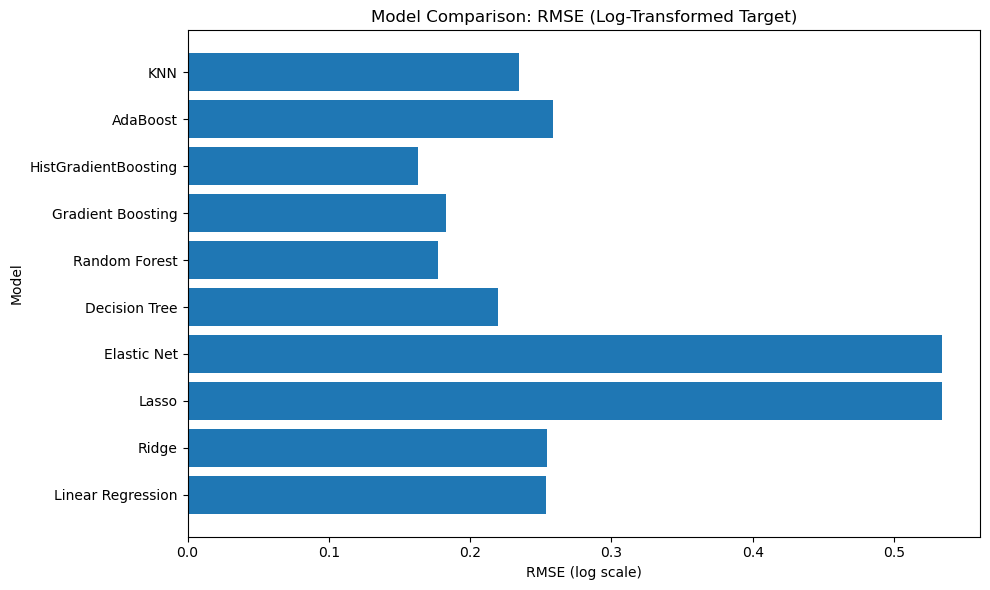

In [78]:
plt.figure(figsize=(10, 6))
plt.barh(results_df['Model'], results_df['RMSE'])
plt.title("Model Comparison: RMSE (Log-Transformed Target)")
plt.xlabel("RMSE (log scale)")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

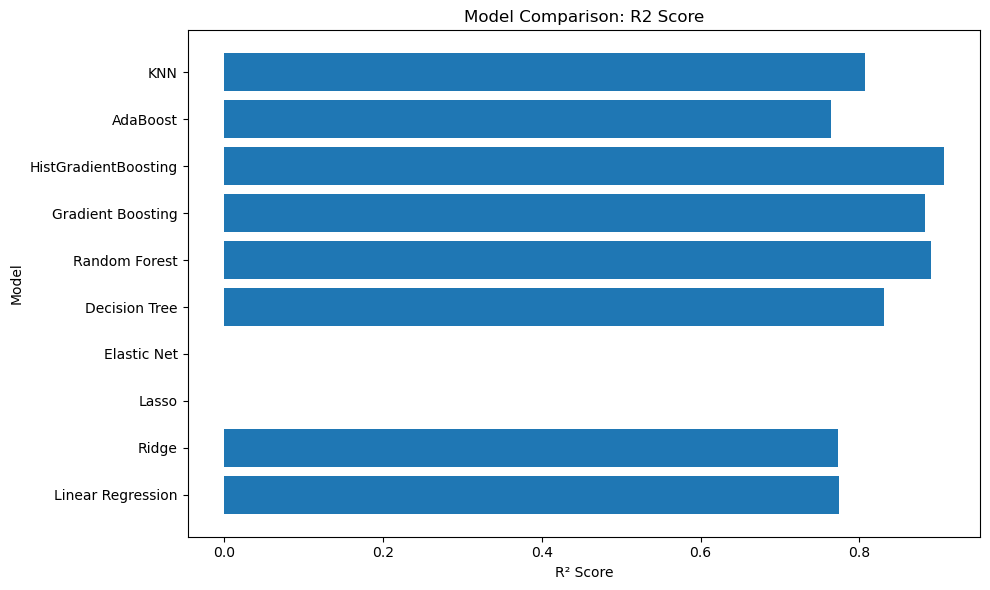

In [79]:
plt.figure(figsize=(10, 6))
plt.barh(results_df['Model'], results_df['R2 Score'])
plt.title("Model Comparison: R2 Score")
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

In [80]:
best_model_row = results_df.loc[results_df['RMSE'].idxmin()]
print("Best Model:", best_model_row['Model'])
print("Best RMSE:", best_model_row['RMSE'])
print("Best R2 Score:", best_model_row['R2 Score'])

Best Model: HistGradientBoosting
Best RMSE: 0.16321328721284173
Best R2 Score: 0.9065414039633962
